In [18]:
import matplotlib.pyplot as plt
import numpy as np

Sample size

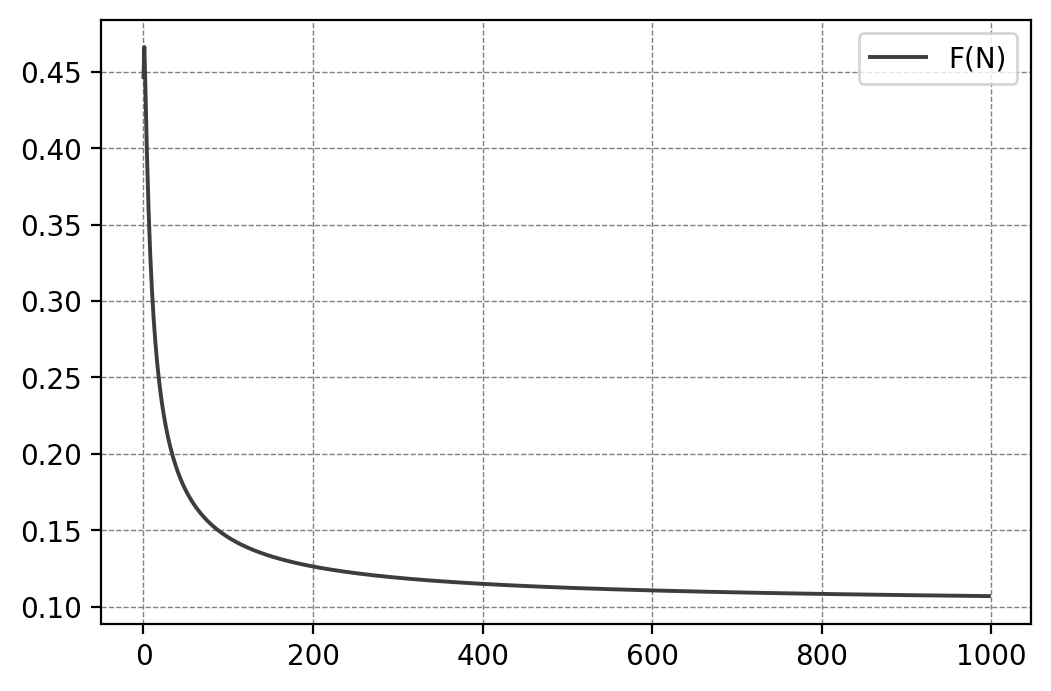

In [45]:
fN = []
for N in range(2,1000):
    epsilon = 0.005
    fN.append(0.1 + np.log(N)/N)
plt.figure(dpi = 200)
plt.plot(fN,color='#3D3D3D',linewidth=1.4,label='F(N)')
plt.grid(visible=True,color='gray', linestyle='dashed', linewidth=0.5)
plt.legend()
plt.savefig('images/fN.png')

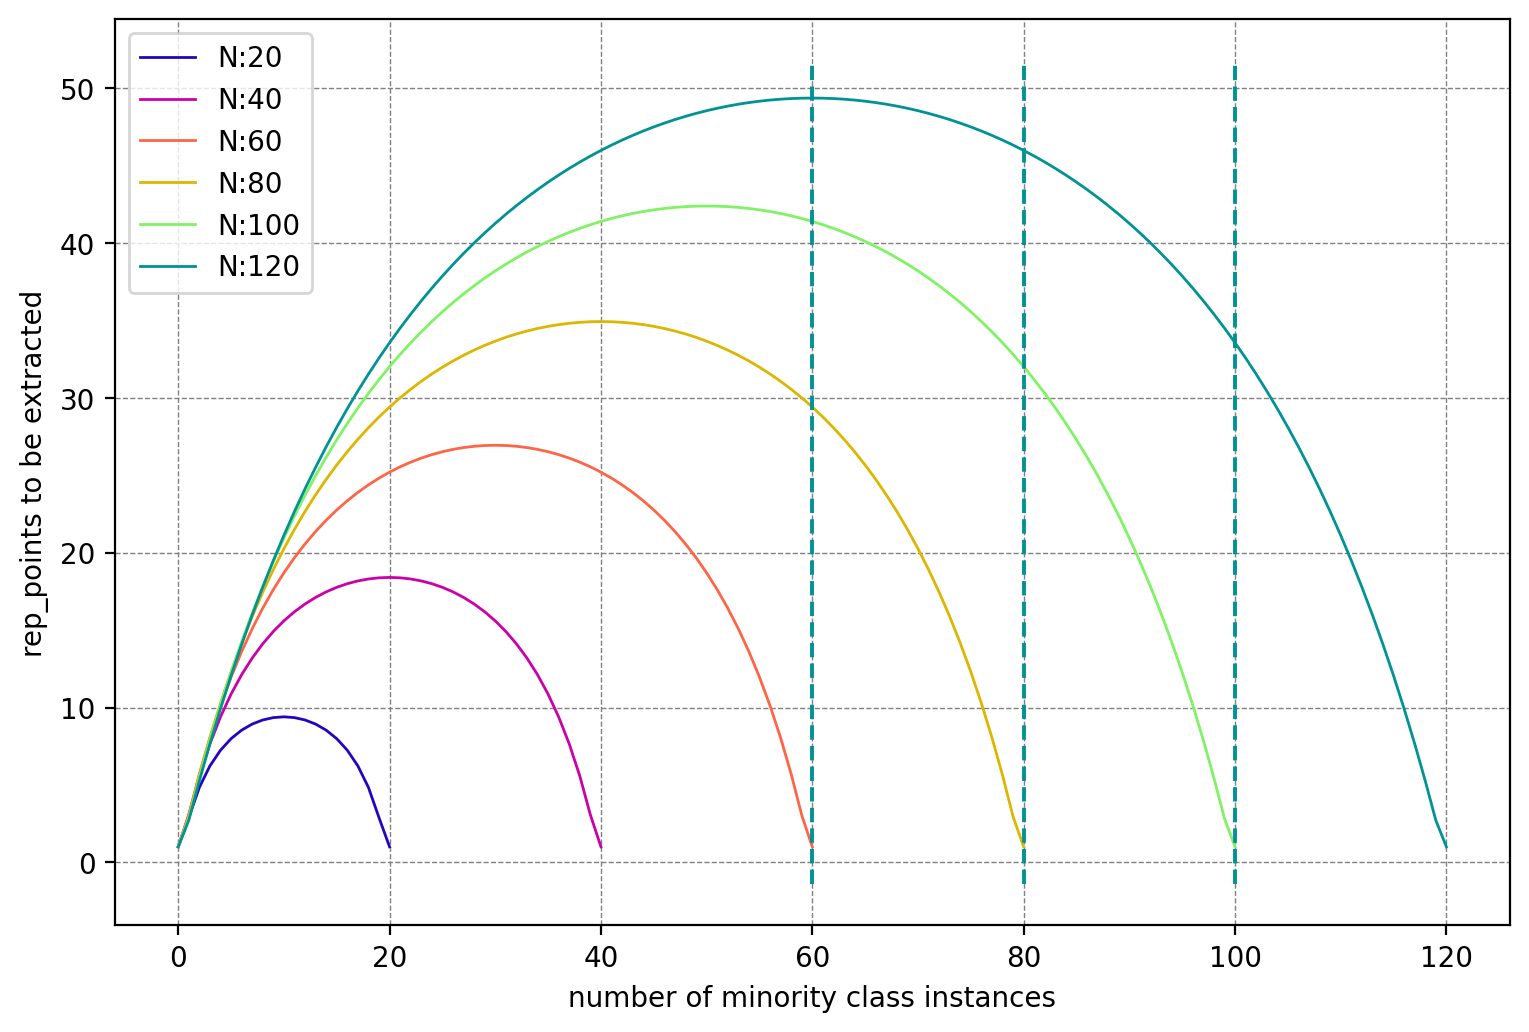

In [44]:
import colorir
grad = colorir.PolarGrad(["#2304C0","FE6546","80F365","1B205F"])
c = iter(grad.n_colors(7))
plt.figure(figsize=(9,6),dpi=200)
for N in [20,40,60,80,100,120]:
    size1s = []
    for num_min in range(N+1):
        p = num_min/N

        # size1 might be 0 when num_min == 0 or num_min == N, then set c = 1, choose centroid as rep_point directly
        if p==0 or p==1:
            size1 = 1

        else:
            Z = 1.64
            epsilon = 0.05
            e = epsilon + np.log(N)/N
            x = (Z**2 * p * (1-p)) / (e**2)
            size1 = (N * x) / (x + N - 1)

        size1s.append(size1)
    color = next(c)
    plt.plot(size1s,label='N:'+str(N),alpha=1, linewidth=1,color=color)
plt.grid(visible=True,color='gray', linestyle='dashed', linewidth=0.5)
y1 = plt.ylim()[0]
y2 = plt.ylim()[1]
plt.vlines(60,y1, y2, linestyles='dashed',linewidth=1.4,color=color)
plt.vlines(80,y1, y2, linestyles='dashed',linewidth=1.4,color=color)
plt.vlines(100,y1, y2,linestyles='dashed',linewidth=1.4,color=color)

plt.xlabel('number of minority class instances')
plt.ylabel('rep_points to be extracted')
plt.legend(loc = 'upper left')
#     print(num_min,'|',size1)
plt.savefig('images/rep_extract.png')

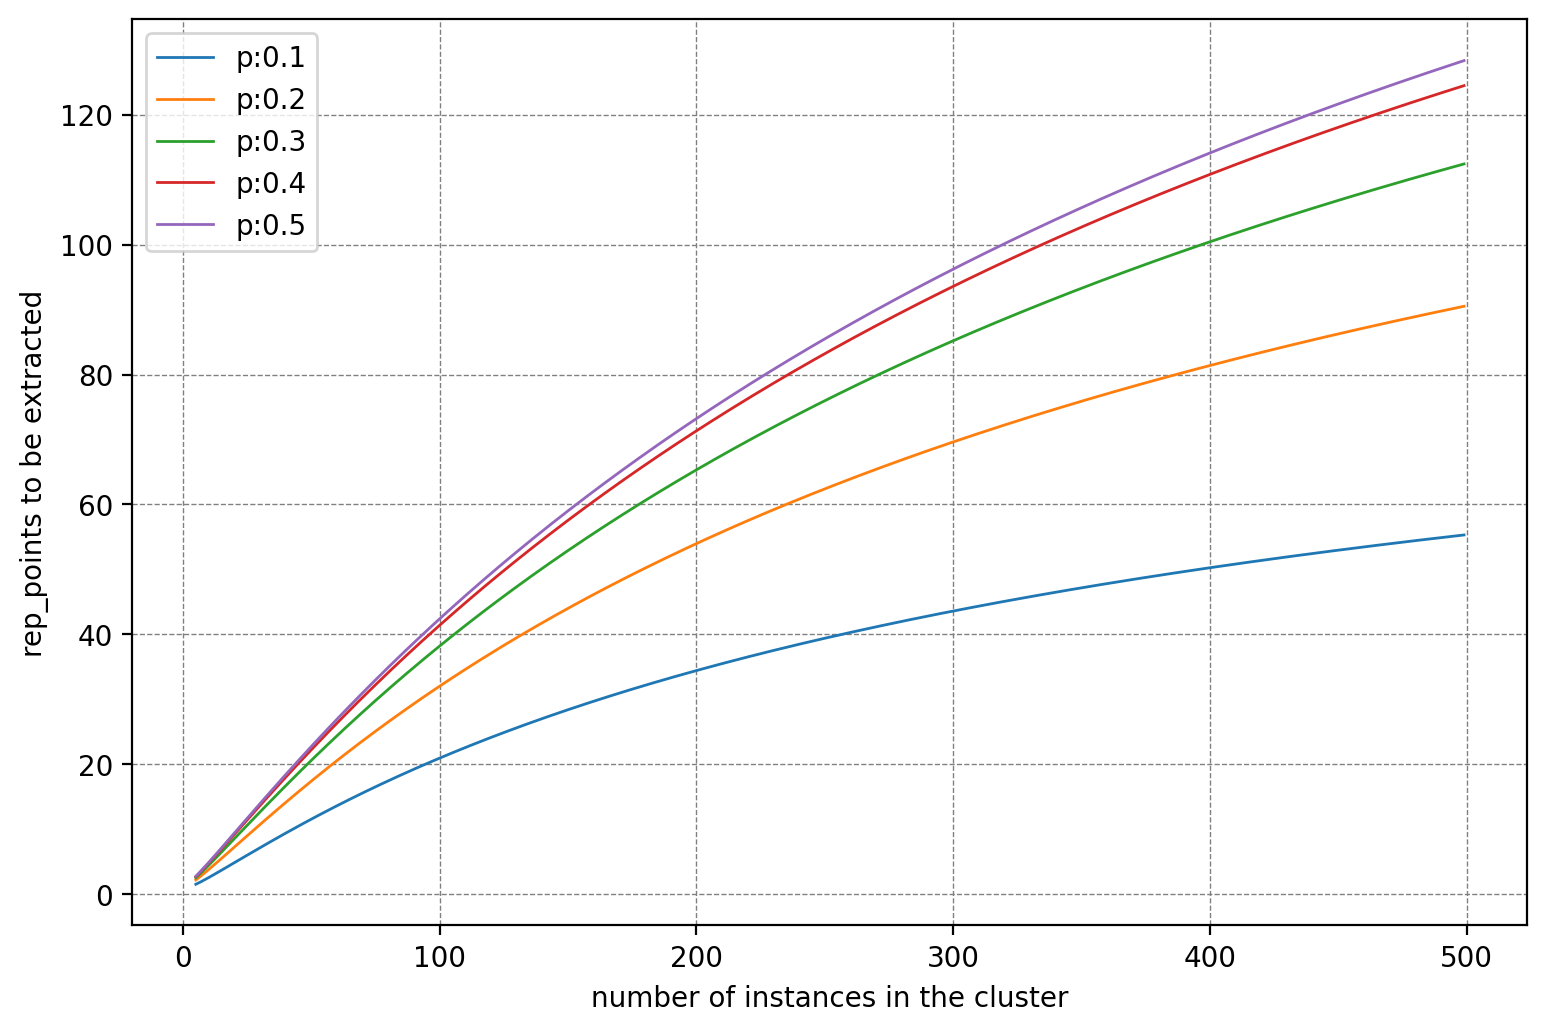

In [27]:
plt.figure(figsize=(9,6),dpi=200)
for p in [0.1,0.2,0.3,0.4,0.5]:
    size1s = []
    for N in range(5,500):
#         p = num_min/N

        # size1 might be 0 when num_min == 0 or num_min == N, then set c = 1, choose centroid as rep_point directly
        if p==0 and N >= 9:
            size1 = 0
        elif p==0 or p==1:
            size1 = 1
        else:
            Z = 1.64
            epsilon = 0.05
            e = epsilon + np.log(N)/N
            x = (Z**2 * p * (1-p)) / (e**2)
            size1 = (N * x) / (x + N - 1)

        size1s.append(size1)
    plt.plot(range(5,500),size1s,label='p:'+str(round(p,2)),alpha=1, linewidth=1)
    plt.grid(visible=True,color='gray', linestyle='dashed', linewidth=0.5)

plt.xlabel('number of instances in the cluster')
plt.ylabel('rep_points to be extracted')
plt.legend(loc = 'upper left')
#     print(num_min,'|',size1)
# plt.savefig('images/rep_extract.png')

Gaussian Generator

In [3]:
from COS_Funcs.utils import *
from COS_Funcs.cos.cos import *
from COS_Funcs.utils.visualize import *
X,y = read_data('Datasets/sampledata_new_3.csv',)
X_train,X_test,y_train,y_test = split_data(X,y)
N = 50
c = 0
alpha = 0.2
clusters,all_reps,_,labels = clustering(X_train,y_train,N,c,alpha)
tree = create_kd(X_train)
areas,min_all_safe_area,min_half_safe_area = safe_areas(X_train,tree,all_reps,y_train) 
area = min_all_safe_area[9]

In [29]:
def gd(x, mu=0, sigma=0.1):
    '''
    sigma: std
    '''
    left = 1 / (np.sqrt(2 * math.pi) * np.sqrt(sigma))
    right = np.exp(-(x - mu)**2 / (2 * sigma))
    return left * right

x = np.arange(-1.5, 1.5, 0.001) 

In [36]:
y = gd(x, sigma=0.2)

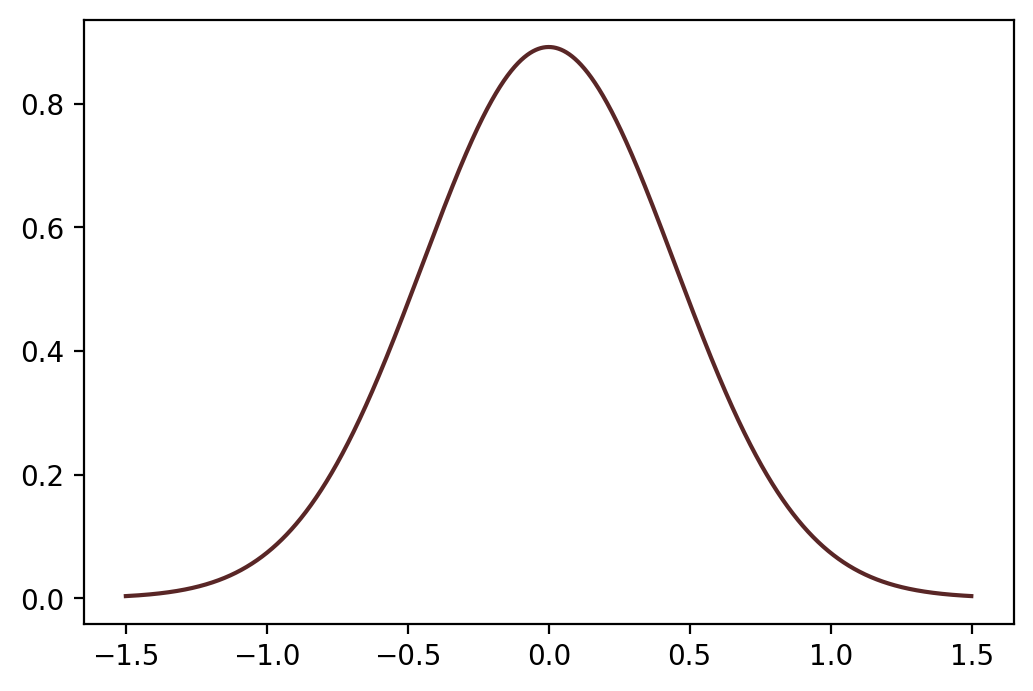

In [37]:
plt.figure(dpi = 200)
plt.plot(x,y,c=rep_color,linewidth=1.5)

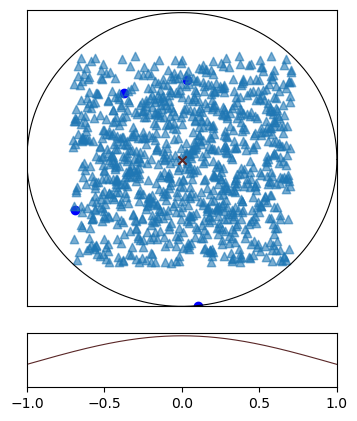

In [39]:
import numpy as np
std = 1

# Generate some samples
new_points = G.Gaussian_Generator(area,1000,std)

# Gaussian 
y = gd(x, sigma=std)

minlabel,majlabel = G.get_label_in_areas(area)
min_neighbor = area.nearest_neighbor[area.nearest_neighbor_label == minlabel]
maj_neighbor = area.nearest_neighbor[area.nearest_neighbor_label == majlabel]

r = area.radius
center = area.rep_point
x_ = np.linspace(center[0] - r, center[0] + r, 5000)
y1 = np.sqrt(abs(r**2 - (x_ - center[0])**2)) + center[1]
y2 = -np.sqrt(abs(r**2 - (x_ - center[0])**2)) + center[1]

fig = plt.figure(figsize = (4,5),dpi = 100)   
grid = plt.GridSpec(5,                   # 行数 
                    4,                   # 列数
                    hspace = 0.5,        # 行与行之间的间隔
                    wspace = 0.2)        # 列与列之间的间隔

ax_main = fig.add_subplot(grid[:-1, 0:],xticks=[],yticks=[],xlim=[min(x_),max(x_)],ylim=[min(y2),max(y1)+0.001])
ax_head = fig.add_subplot(grid[-1, 0:],xlim=[-1,1],yticks=[])


ax_main.scatter(min_neighbor[:,0],min_neighbor[:,1],marker=min_mark,c=min_color,label=min_label)
ax_main.scatter(maj_neighbor[:,0],maj_neighbor[:,1],marker=maj_mark,c=maj_color,label=maj_label)

ax_main.scatter(new_points[:,0],new_points[:,1],marker=syn_mark,c=syn_c,label=syn_label,alpha=syn_alpha)
ax_main.scatter(area.rep_point[0],area.rep_point[1],c=rep_color,marker=rep_mark,label=rep_label[:-1]    )

# ax_main.set(title='std = '+str(std))


ax_main.plot(x_, y1, 'k',linewidth=0.8)
ax_main.plot(x_, y2, 'k',linewidth=0.8)

ax_main.grid(visible=True,color=grid_color, linestyle=grid_line, linewidth=grid_line_width)
                          
ax_head.plot(x,y,c=rep_color,linewidth=0.8)
# ax_head.invert_yaxis()

plt.savefig('images/std_'+str(std)+'.png')

Filter

In [ ]:
from COS_Funcs.utils import *
from COS_Funcs.cluster import clustering
from COS_Funcs.cos.cos import *
from COS_Funcs.cos.generate import *
from COS_Funcs.cos import nearest_neighbor
import pandas as pd
import numpy as np

X,y = read_data('Datasets/sampledata_new_3.csv',)
X_train,X_test,y_train,y_test = split_data(X,y)
N = 50
c = 0
alpha = 0.2
clusters,all_reps,_,labels = clustering(X_train,y_train,N,c,alpha)
areas,min_all_safe_area,min_half_safe_area = safe_areas(X_train,all_reps,y_train) 

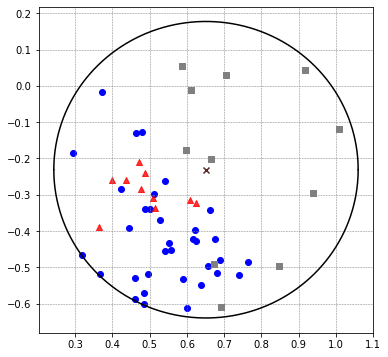

In [10]:
area = min_half_safe_area[1] #2 3 14 26 27
tree = create_kd(X_train)
new_samples_gau = Gaussian_Generator(area,10,tree=tree,y_train=y_train)
V.show_single_area(area,new_samples_gau,close_axis=False)

result vs safe areas

In [ ]:
measure = 'TP'
dataset_dict ={}

for dataset in baseline.datasets:
    if 'oil' in dataset:
        continue
    linkage = baseline.linkages[os.path.basename(dataset)]
    _,_,_,score_ls,safe_neighbor_ls,all_neighbor_ls = baseline.cos_baseline_(dataset,measure,'knn',k=1,linkage=linkage)
    dataset_dict[dataset]={}
    dataset_dict[dataset]['score_ls'] = score_ls
    dataset_dict[dataset]['safe_neighbor_ls'] = safe_neighbor_ls
    dataset_dict[dataset]['all_neighbor_ls'] = all_neighbor_ls
    
alphas = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
index = list(map(lambda x:os.path.basename(x).split('.')[0],baseline.datasets))

df_score = pd.DataFrame(index=index,columns=alphas)
df_safe = pd.DataFrame(index=index,columns=alphas)
df_all = pd.DataFrame(index=index,columns=alphas)

for key in dataset_dict:
    dataset = os.path.basename(key).split('.')[0]
    df_score.loc[dataset] = dataset_dict[key]['score_ls']
    df_safe.loc[dataset] = dataset_dict[key]['safe_neighbor_ls']
    df_all.loc[dataset] = dataset_dict[key]['all_neighbor_ls']
    
to_excel(measure+'_vs_minneighbor.xlsx',[df_score,df_safe,df_all],[measure,'safe_neighbor_rate','all_neighbor_rate'])

In [ ]:
import pandas as pd

In [28]:
df = pd.read_excel('TP_vs_area.xlsx',sheet_name=None,index_col=0)
df_score = df['TP']
df_safe = df['safe_area']
df_half = df['half_safe_area']
df_rep = df['rep_point']

In [155]:
datasets = df_score.index
datasets = list(datasets)

datasets.remove('abalone5–10')
datasets.remove('ecoli-0-3-4-7_vs_5-6')
datasets.remove('eligibility-loan')
datasets.remove('ecoli1')
datasets.remove('ecoli-0-3-4_vs_5')
datasets.remove('abalone11–17')
datasets.remove('cleveland-0_vs_4')
datasets.remove('leaf')
datasets.remove('glass1')
datasets.remove('page-blocks2vs4')
datasets.remove('page-blocks3vs5')
datasets.remove('pima-indians-diabetes')
datasets.remove('parkinsons')
datasets.remove('led7digit-0-2-4-5-6-7-8-9_vs_1')
datasets.remove('sampledata_new_1')
datasets.remove('sampledata_new_2')
datasets.remove('ecoli2')
datasets.remove('winequality-red-3456vs78')
datasets.remove('yeast-0-2-5-6_vs_3-7-8-9')
datasets.remove('yeast-0-3-5-9_vs_7-8')
datasets.remove('yeast4')
datasets.remove('yeast3')
datasets.remove('yeast5')
datasets.remove('yeast-1-2-8-9_vs_7')
datasets.remove('vertebral')
datasets.remove('yeast-0-5-6-7-9_vs_4')
datasets.remove('glass-0-1-4-6_vs_2')
datasets.remove('page-blocks1vs2345') # remove
datasets.remove('sampledata_new_3')
datasets.remove('maternal-Risk-lmvsh') # remove

abalone9-18
ecoli3
glass2
glass5
haberman
new-thyroid1
sampledata1
yeast-1-4-5-8_vs_7
yeast1


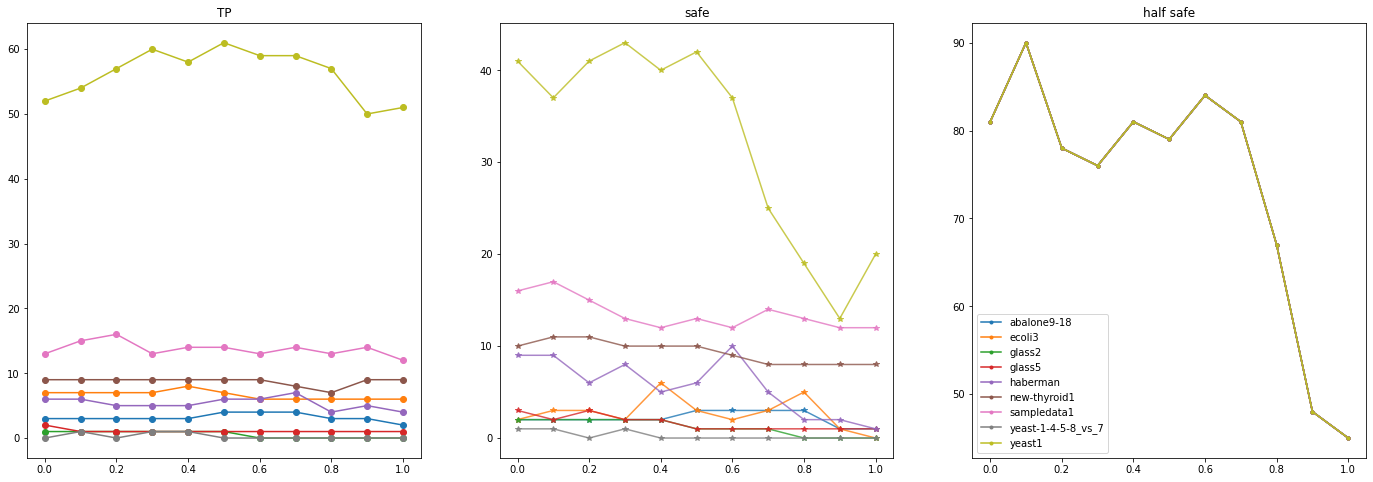

In [159]:
alphas = df_score.columns
plt.figure(figsize=(24,8))
    
for dataset in datasets[:]:
    
    score = df_score.loc[dataset].values
    safe = df_safe.loc[dataset].values
#     half = df_half.loc[dataset].values
    rep = df_rep.loc[dataset].values
#     sum_ = half+safe
#     safe = safe/rep
    if len(np.unique(score)) == 1 or len(np.unique(safe)) == 1:
        continue
    print(dataset)
    plt.subplot(1,3,1)
    plt.plot(alphas,score,marker='o',label=dataset)
    plt.title('TP')
    plt.subplot(1,3,2)
    plt.plot(alphas,safe,marker='*',label=dataset,alpha=0.8)
    plt.title('safe')
    plt.subplot(1,3,3)
    plt.plot(alphas,half,marker='.',label=dataset)
    plt.title('half safe')
    
plt.legend()

In [10]:
# safe proof
abalone9-18,glass-0-1-4-6_vs_2,ecoli3,haberman,glass5,yeast-1-4-5-8_vs_7,yeast1

1